##### First install and import relevant libraries

In [1]:
pip install lonboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 560.5/560.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 621.3/621.3 kB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 9.0.0
    Uninstalling pyarrow-9.0.0:
      Successfully uninstalled pyarrow-9.0.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does no

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import geopandas as gpd
# This is a super popular library for working with ML and DL algorithms.
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import shapely
import folium
import seaborn as sns
from lonboard import Map, SolidPolygonLayer

#More Libraries
from matplotlib import pyplot as plt
import seaborn as sns

##### Give access to google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#### 1. Data exploration load the Chicago parcels dataset using pandas.

In [4]:
data = gpd.read_file("/content/drive/MyDrive/Assignment/chicago_parcels.zip")

#### 2. Display the first 2 few rows of the dataset investigate the available attributes and their data types.

In [ ]:
data.head(5)

,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry
0,1,93,0.01,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159..."
1,2,94,0.00,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452..."
2,3,96,0.02,836300013,836300013,"POLYGON ((1092323.996 1942962.610, 1092301.306..."
3,4,95,0.01,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.190..."
4,5,92,0.01,836300009,836300009,"POLYGON ((1091970.533 1942338.191, 1091929.082..."


In [ ]:
data.dtypes

POLY_ID        int64
ID             int64
AREA         float64
PIN_OLD        int64
PIN            int64
geometry    geometry
dtype: object

#### 3. Create a map to visualize the spatial distribution of tax parcel polygons in Chicago. This is a dataset with more than a half millions of records, therefore if you use the traditional matplotlib or pandas you will reach the RAM limit of Colab, you need to use lonboard library and the SolidPolygonLayer layer to render polygons.

In [ ]:
layer = SolidPolygonLayer.from_geopandas(data)
map = Map(layers=[layer], _height=500)
map

/usr/local/lib/python3.10/dist-packages/lonboard/_layer.py:112: UserWarning: GeoDataFrame being reprojected to EPSG:4326
  warnings.warn("GeoDataFrame being reprojected to EPSG:4326")


Map(layers=[SolidPolygonLayer(table=pyarrow.Table
POLY_ID: uint32
ID: uint32
AREA: float
PIN_OLD: int32
PIN: i…

#### T4 Correlation Analysis: Explore correlations between spatial attributes (latitude, longitude) and numerical attributes. Using the text cell, provide insights into any observed correlations.

In [5]:
#Convert geometry in Latitude/Longitude
data['longitude']=data['geometry'].centroid.x
data['latitude']=data['geometry'].centroid.y
data.head()

,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry,longitude,latitude
0,1,93,0.01,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159...",1.091780e+06,1.943042e+06
1,2,94,0.00,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452...",1.092427e+06,1.943134e+06
2,3,96,0.02,836300013,836300013,"POLYGON ((1092323.996 1942962.610, 1092301.306...",1.091688e+06,1.942695e+06
3,4,95,0.01,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.190...",1.091538e+06,1.942343e+06
4,5,92,0.01,836300009,836300009,"POLYGON ((1091970.533 1942338.191, 1091929.082...",1.091543e+06,1.942083e+06


##### There doesn't appear to be an obvious correlation between spatial attributes and numerical attributes.

#### T5- K-Means Clustering: Implement K-Means clustering with different values of n_clusters.

#### T6- : Visualize the clustering results for each value of n_clusters, using multiple lonboard maps, and customized colour ramps

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  w

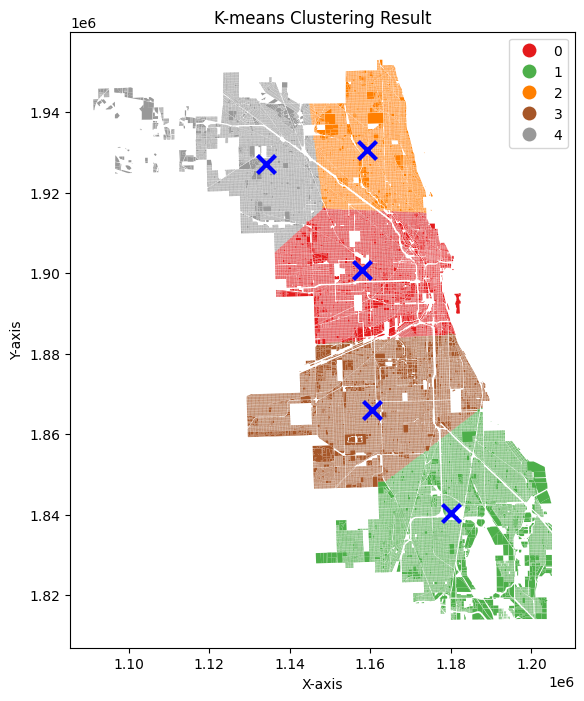

In [ ]:
#5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(data[['longitude', 'latitude']])

# Visualize K-means clustering result
data.plot(column='kmeans_cluster', categorical=True, legend=True, figsize=(8, 8), cmap='Set1')

# Plot the centroids as a X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="b",
    zorder=10,
)
plt.title('K-means Clustering Result')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  w

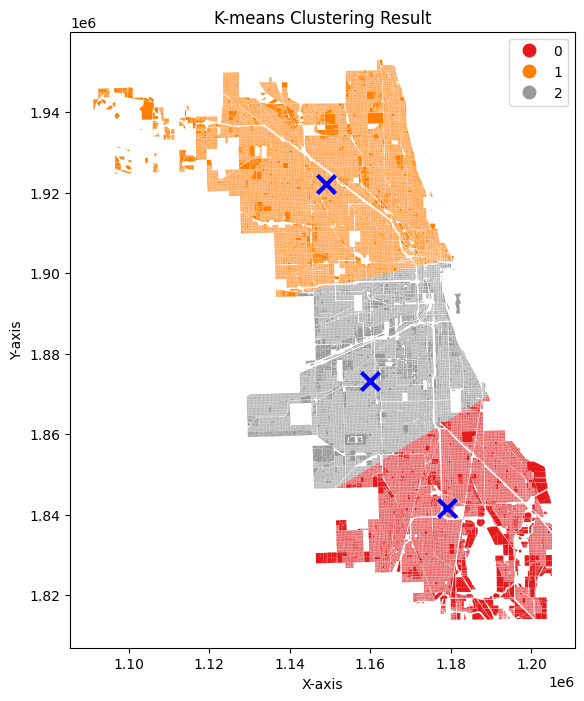

In [ ]:
#3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(data[['longitude', 'latitude']])

# Visualize K-means clustering result
data.plot(column='kmeans_cluster', categorical=True, legend=True, figsize=(8, 8), cmap='Set1')

# Plot the centroids as a X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="b",
    zorder=10,
)
plt.title('K-means Clustering Result')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  w

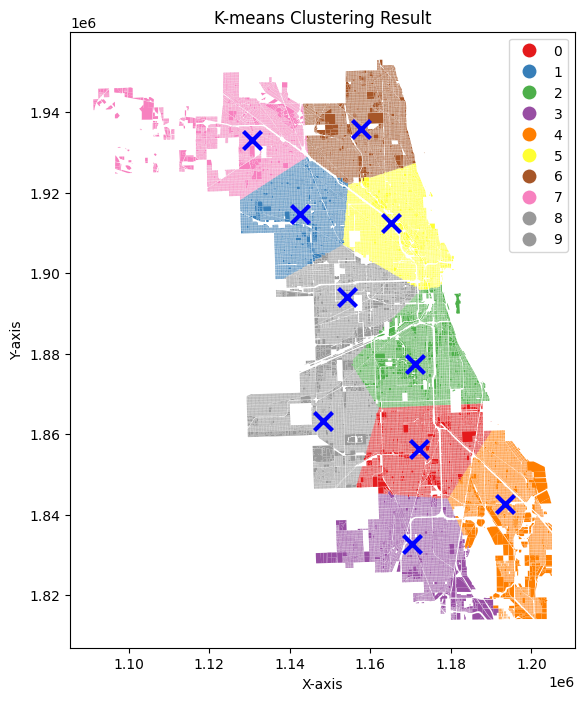

In [ ]:
#10 clusters
kmeans = KMeans(n_clusters=10, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(data[['longitude', 'latitude']])

# Visualize K-means clustering result
data.plot(column='kmeans_cluster', categorical=True, legend=True, figsize=(8, 8), cmap='Set1')

# Plot the centroids as a X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="b",
    zorder=10,
)
plt.title('K-means Clustering Result')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

#### T7: Evaluate the clustering results and choose an “optimal” value for n_clusters. Justify your choice in a markdown cell.

##### From the n_clusters tesetd 5 is probably the most optimal. This is because 3 groups the data too broadly whereas with 10 there is the opposite problem with the data being split up excessively. It probably depends what you are using the data for but I think around 5-7 clusters makes the most sense for this data.

#### T8: DBSCAN Clustering: Implement the DBSCAN method. Experiment with different values of eps and min_samples in DBSCAN ( at least three).

In [6]:
#eps = 0.005
#min samples =20
dbscan1 = DBSCAN(eps=0.005, min_samples=20)
data['dbscan_cluster1'] = dbscan1.fit_predict(data[['longitude', 'latitude']])

#min samples =40
dbscan2 = DBSCAN(eps=0.005, min_samples=40)
data['dbscan_cluster2'] = dbscan2.fit_predict(data[['longitude', 'latitude']])

#min samples =100
dbscan3 = DBSCAN(eps=0.005, min_samples=100)
data['dbscan_cluster3'] = dbscan3.fit_predict(data[['longitude', 'latitude']])

#eps = 0.05
#min samples =20
dbscan4 = DBSCAN(eps=0.05, min_samples=20)
data['dbscan_cluster4'] = dbscan4.fit_predict(data[['longitude', 'latitude']])

#min samples =40
dbscan5 = DBSCAN(eps=0.05, min_samples=40)
data['dbscan_cluster5'] = dbscan5.fit_predict(data[['longitude', 'latitude']])

#min samples =100
dbscan6 = DBSCAN(eps=0.05, min_samples=100)
data['dbscan_cluster6'] = dbscan6.fit_predict(data[['longitude', 'latitude']])

#eps = 0.5
#min samples =20
dbscan7 = DBSCAN(eps=0.5, min_samples=20)
data['dbscan_cluster7'] = dbscan7.fit_predict(data[['longitude', 'latitude']])

#min samples =40
dbscan8 = DBSCAN(eps=0.5, min_samples=40)
data['dbscan_cluster8'] = dbscan8.fit_predict(data[['longitude', 'latitude']])

#min samples = 100
dbscan9 = DBSCAN(eps=0.5, min_samples=100)
data['dbscan_cluster9'] = dbscan9.fit_predict(data[['longitude', 'latitude']])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.ty

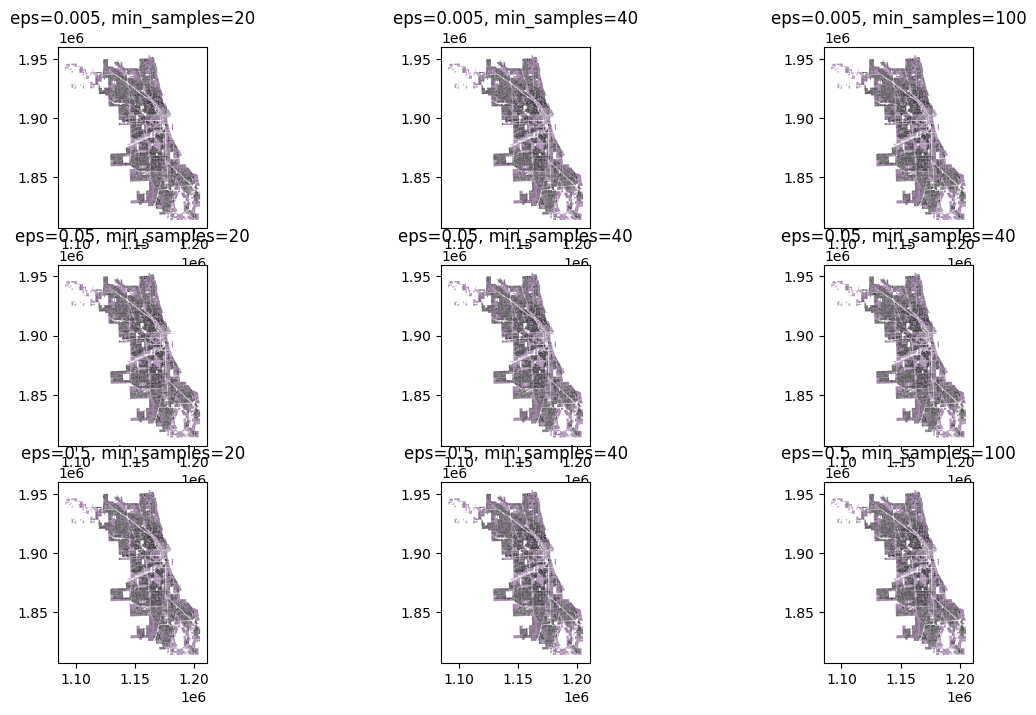

In [7]:
# Visualize clustering results
fig, axes = plt.subplots(3, 3, figsize=(14, 8))

# DBSCAN
data.plot(ax=axes[0,0], column='dbscan_cluster1', categorical=True, legend=False, markersize=1, alpha=0.5, cmap='viridis')
axes[0,0].set_title('eps=0.005, min_samples=20')

data.plot(ax=axes[0,1], column='dbscan_cluster2', categorical=True, legend=False, markersize=1, alpha=0.5, cmap='viridis')
axes[0,1].set_title('eps=0.005, min_samples=40')

data.plot(ax=axes[0,2], column='dbscan_cluster3', categorical=True, legend=False, markersize=1, alpha=0.5, cmap='viridis')
axes[0,2].set_title('eps=0.005, min_samples=100')


data.plot(ax=axes[1,0], column='dbscan_cluster4', categorical=True, legend=False, markersize=1, alpha=0.5, cmap='viridis')
axes[1,0].set_title('eps=0.05, min_samples=20')

data.plot(ax=axes[1,1], column='dbscan_cluster5', categorical=True, legend=False, markersize=1, alpha=0.5, cmap='viridis')
axes[1,1].set_title('eps=0.05, min_samples=40')

data.plot(ax=axes[1,2], column='dbscan_cluster6', categorical=True, legend=False, markersize=1, alpha=0.5, cmap='viridis')
axes[1,2].set_title('eps=0.05, min_samples=40')


data.plot(ax=axes[2,0], column='dbscan_cluster7', categorical=True, legend=False, markersize=1, alpha=0.5, cmap='viridis')
axes[2,0].set_title('eps=0.5, min_samples=20')

data.plot(ax=axes[2,1], column='dbscan_cluster8', categorical=True, legend=False, markersize=1, alpha=0.5, cmap='viridis')
axes[2,1].set_title('eps=0.5, min_samples=40')

data.plot(ax=axes[2,2], column='dbscan_cluster9', categorical=True, legend=False, markersize=1, alpha=0.5, cmap='viridis')
axes[2,2].set_title('eps=0.5, min_samples=100')

plt.show()


#### T10: Using a text cell provide you insights and evaluation of the impact of changes in eps and min_samples on the clusters, and finally recommend suitable values for eps and min_samples based on your analysis. Note: Consider the real-world implications of your findings, especially in the context of urban planning or data-driven decision-making.

###### The chnages I made to eps and min_samples haven't had much of an effect. This isn't very useful and I probably should've chosen different values in order to see more of a difference.

##### In theory, eps should define the search distance and minimum sample defines the number of features per cluster. I probably set both of these values too high which is why you don't really see a difference in the matrix.